# Libraries/Import Dataset

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Dataset
book=pd.read_csv('/content/book.csv')
book.head(5)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0



 * Data preprocessing not required as it is already in transaction format

# Aprior Algorithm

##1. Association rules with 5% Support and 80% confidence

In [ ]:
# With 5% Support
frequent_itemsets=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [ ]:
# With 80% confidence
rules1=association_rules(frequent_itemsets,metric='lift',min_threshold=0.8)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


In [ ]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(GeogBks, ArtBks, ChildBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
658,(ChildBks),"(CookBks, ArtBks, GeogBks, DoItYBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
659,(GeogBks),"(CookBks, ArtBks, ChildBks, DoItYBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(DoItYBks),"(CookBks, ArtBks, ChildBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6aafffd10>,
      dtype=object)

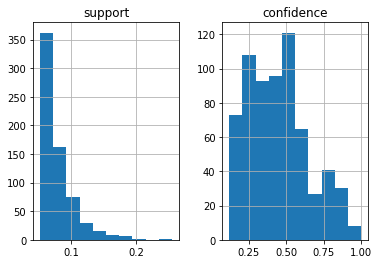

In [ ]:
rules1[['support','confidence']].hist()

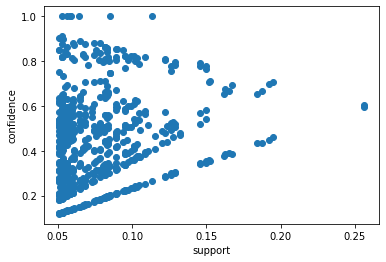

In [ ]:
# visualization of obtained rule
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

(array([ 0.5,  4.5,  8.5, 12.5, 16.5, 20.5, 24.5, 28.5, 32.5, 36.5, 40.5,
        44.5, 48.5, 52.5, 56.5, 60.5, 64.5, 68.5, 72.5, 76.5, 80.5, 84.5,
        88.5]), <a list of 23 Text major ticklabel objects>)

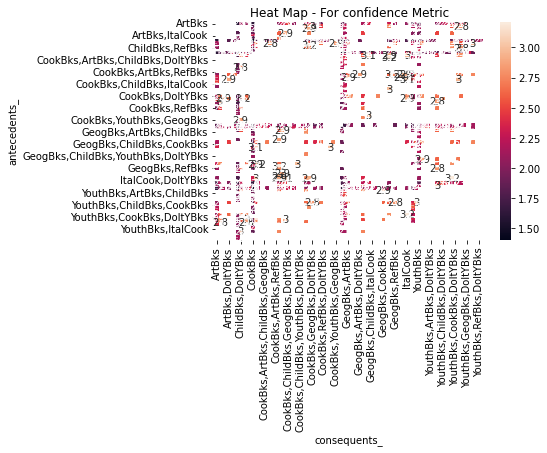

In [ ]:
rules1['antecedents_'] = rules1['antecedents'].apply(lambda a: ','.join(list(a)))
rules1['consequents_'] = rules1['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules1[rules1.lift>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

##2. Association rules with 20% Support and 60% confidence

In [ ]:
# With 20% Support
frequent_itemsets1=apriori(book,min_support=0.20,use_colnames=True)
frequent_itemsets1.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [ ]:
# With 60% confidence
rules2=association_rules(frequent_itemsets1,metric='lift',min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6aaf12790>,
      dtype=object)

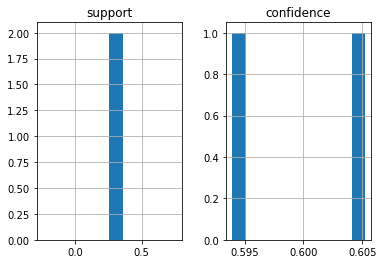

In [ ]:
rules2[['support','confidence']].hist()

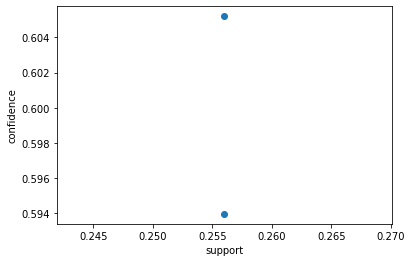

In [ ]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

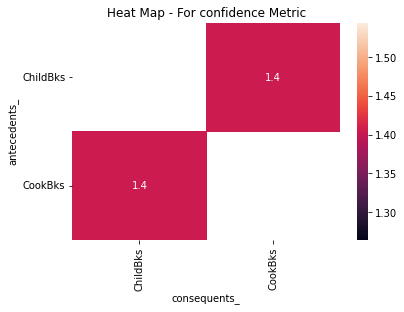

In [ ]:
rules2['antecedents_'] = rules2['antecedents'].apply(lambda a: ','.join(list(a)))
rules2['consequents_'] = rules2['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules2[rules2.lift>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)